In [2]:
import sklearn
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# format for seaborn visualisation 
# sns.lmplot(x="sepal_length", y="sepal_width", hue="species", truncate=True, size=5, data=iris)

In [56]:
data = pd.read_csv("movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [57]:
data.shape

(5043, 28)

In [58]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [59]:
len(data.columns)

28

In [60]:
features = data.columns.tolist()
data[features].iloc[0]

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

In [72]:
df = data.drop(['country', 'color','aspect_ratio'], axis = 1)
df = df.dropna(axis= 0)

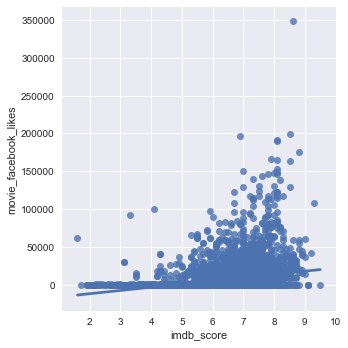

In [73]:
#visualise the relation between movie facebook likes and the imdb rating
g = sns.lmplot(x="imdb_score", y="movie_facebook_likes", truncate=True, size=5, data=data)
plt.show()

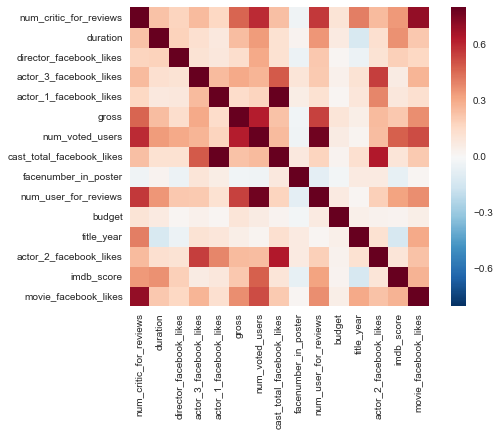

In [74]:
#make the correlation matrix
matrix = df.corr()
sns.heatmap(matrix, vmax = .8, square = True)
plt.show()

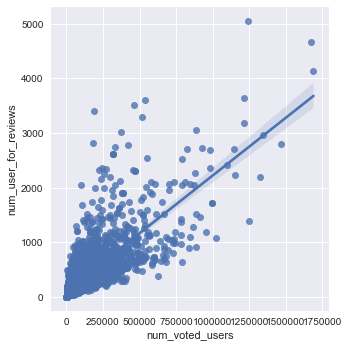

In [75]:
#visualise the relatiob between num_voted_users and num_users_for_reviews
g = sns.lmplot(x="num_voted_users", y="num_user_for_reviews", truncate=True, size=5, data=df)
plt.show()


In [128]:
col = df.columns.tolist()
columnes = [c for c in col if c not in ["imdb_score","director_name", "actor_2_name","genres","content_rating","actor_1_name", "movie_title", "actor_3_name", "plot_keywords", "movie_imdb_link", "language"]]
targetcol = "imdb_score"

In [129]:
train_data, test_data = train_test_split(df,test_size = 0.20 )

#print the train_data
print train_data

              director_name  num_critic_for_reviews  duration  \
3400          François Ozon                   128.0     111.0   
4987            Lena Dunham                   113.0      98.0   
2369           Lee Tamahori                   167.0     109.0   
538        Thor Freudenthal                   107.0     100.0   
371            Dennis Dugan                   198.0     113.0   
359             Ben Stiller                   362.0     114.0   
2541             Rob Reiner                   114.0      89.0   
1289         Paul Verhoeven                   181.0     131.0   
1649             Jon M. Chu                   138.0     107.0   
4195          Jake Schreier                   252.0      89.0   
4863          Greg Harrison                    43.0      78.0   
885       Karey Kirkpatrick                    93.0     107.0   
720          Brenda Chapman                   120.0      99.0   
1249         John McTiernan                    25.0     106.0   
76           Kevin Reynol

In [130]:
print test_data

              director_name  num_critic_for_reviews  duration  \
4681         David S. Goyer                   178.0      89.0   
46             Marc Forster                   654.0     123.0   
2328       Richard Benjamin                    28.0      80.0   
2864         Michael Polish                   113.0     104.0   
4118           Rupert Wyatt                   175.0     111.0   
1875            Tate Taylor                   373.0     146.0   
3064       Tim Blake Nelson                    92.0      95.0   
2118         Paul Verhoeven                   231.0     145.0   
4075             Benny Boom                    49.0      84.0   
3739          Joe Chappelle                   123.0      93.0   
1247      Mathieu Kassovitz                   207.0      98.0   
4726           Chris Kentis                   235.0      79.0   
173              Peter Weir                   244.0     138.0   
1172    Julie Anne Robinson                   127.0      91.0   
4804            Tom Vaugh

In [131]:
df.shape

(3805, 25)

In [132]:
df.columns

Index([u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'movie_facebook_likes'],
      dtype='object')

In [133]:
linear = LinearRegression()
linear.fit(train_data[columnes], train_data[targetcol])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
#print columnes
predictions = linear.predict(test_data[columnes])

mean_squared_error(predictions, test_data[targetcol])

0.78345274788669739

In [135]:
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state =1)
RFR.fit(train_data[columnes], train_data[targetcol])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [136]:
predictions = RFR.predict(test_data[columnes])

mean_squared_error(predictions, test_data[targetcol])

0.51375765681277186

In [154]:
test_data[columnes].iloc[0]

num_critic_for_reviews            178.0
duration                           89.0
director_facebook_likes           687.0
actor_3_facebook_likes            389.0
actor_1_facebook_likes          10000.0
gross                        42638165.0
num_voted_users                 42183.0
cast_total_facebook_likes       12183.0
facenumber_in_poster                1.0
num_user_for_reviews              230.0
budget                       16000000.0
title_year                       2009.0
actor_2_facebook_likes            787.0
movie_facebook_likes                0.0
Name: 4681, dtype: float64

In [155]:
test_data[targetcol].iloc[0]

4.7999999999999998

In [150]:
x = linear.predict(test_data[columnes].iloc[0].values.reshape(1,-1))
print x

[ 6.03206835]


In [153]:
y = RFR.predict(test_data[columnes].iloc[0].values.reshape(1,-1))
print y

[ 5.80440956]


In [156]:
for i in range(100):
    print test_data[targetcol].iloc[i]
    print linear.predict(test_data[columnes].iloc[i].values.reshape(1,-1))
    print RFR.predict(test_data[columnes].iloc[i].values.reshape(1,-1))

4.8
[ 6.03206835]
[ 5.80440956]
7.0
[ 7.93644258]
[ 7.40299452]
2.8
[ 5.72708735]
[ 5.13961091]
6.3
[ 6.07937387]
[ 6.15990483]
6.0
[ 6.28124899]
[ 6.43201788]
8.1
[ 7.37855642]
[ 7.59126138]
6.2
[ 6.03880491]
[ 6.05047411]
7.8
[ 7.00829209]
[ 7.14955417]
5.9
[ 5.55057373]
[ 5.05665978]
4.9
[ 6.22746934]
[ 5.67843112]
5.8
[ 6.450208]
[ 6.11051848]
5.7
[ 5.86391384]
[ 6.61287476]
7.4
[ 6.95507111]
[ 6.39408505]
5.3
[ 5.82433844]
[ 5.39669673]
6.1
[ 6.46870366]
[ 6.79499167]
6.4
[ 6.5237295]
[ 6.18735636]
4.7
[ 6.07423468]
[ 5.33271754]
6.5
[ 6.77782984]
[ 6.85006784]
6.2
[ 5.97548544]
[ 6.29575615]
5.8
[ 6.27259639]
[ 6.24378859]
8.6
[ 8.7481815]
[ 8.44485492]
8.4
[ 5.68949306]
[ 6.68870471]
6.6
[ 6.54294048]
[ 6.67421273]
4.9
[ 6.08209392]
[ 5.33298751]
6.8
[ 6.49366987]
[ 6.78027079]
7.5
[ 6.8143591]
[ 6.27947865]
6.4
[ 5.90728324]
[ 6.09575525]
7.3
[ 6.70167753]
[ 7.14441705]
6.0
[ 6.29144408]
[ 6.24346428]
7.3
[ 7.68434842]
[ 7.2263401]
6.6
[ 6.54669817]
[ 6.26673338]
5.0
[ 6.099785